In [7]:
import os
print(os.listdir(r'C:\Users\ADMIN\Downloads'))


['.ipynb_checkpoints', 'AD3491-Fundamentals-of-Data-Science-and-Analytics-Lecture-Notes-1.pdf', 'AIDS Repository - NM Project.xlsx', 'Annotation 2025-06-30 111207.png', 'Annotation 2025-06-30 112221.png', 'Annotation 2025-07-01 112804.png', 'Annotation 2025-07-01 134745.png', 'Annotation 2025-07-01 135008.png', 'Annotation 2025-07-01 212727.png', 'Awesome Van Gogh Paintings Hd Download.jfif', 'Canva Setup 1.110.0.exe', 'Computer Networks - CS3591 - Notes 4.pdf', 'Computer Networks - CS3591 - Notes.pdf', 'COMPUTER NETWORKS.CN.pdf', 'CPU-Scheduling-and-Algorithm-.pdf', 'CS3591 - CN.docx', 'CS3591-Computer-Networks-Lecture-Notes-1 (1).pdf', 'CS3591-Computer-Networks-Lecture-Notes-1.pdf', 'CS3591-Computer-Networks-Lecture-Notes-2.pdf', 'Dataset .csv', 'desktop.ini', 'diabetes.csv', 'DOC-20250501-WA0003..pdf', 'Document.odt', 'DS_Record_Final.pdf', 'Fundamentals-of-Data-Science-and-Analytics-Apr-May-2024-Question-Paper-Download.pdf', 'Git-2.49.0-64-bit.exe', 'GitHubDesktopSetup-x64.exe', 'G

In [16]:
import os

print(os.listdir(r'C:\Users\ADMIN\Downloads'))




['.ipynb_checkpoints', 'AD3491-Fundamentals-of-Data-Science-and-Analytics-Lecture-Notes-1.pdf', 'AIDS Repository - NM Project.xlsx', 'Annotation 2025-06-30 111207.png', 'Annotation 2025-06-30 112221.png', 'Annotation 2025-07-01 112804.png', 'Annotation 2025-07-01 134745.png', 'Annotation 2025-07-01 135008.png', 'Annotation 2025-07-01 212727.png', 'Awesome Van Gogh Paintings Hd Download.jfif', 'Canva Setup 1.110.0.exe', 'Computer Networks - CS3591 - Notes 4.pdf', 'Computer Networks - CS3591 - Notes.pdf', 'COMPUTER NETWORKS.CN.pdf', 'CPU-Scheduling-and-Algorithm-.pdf', 'CS3591 - CN.docx', 'CS3591-Computer-Networks-Lecture-Notes-1 (1).pdf', 'CS3591-Computer-Networks-Lecture-Notes-1.pdf', 'CS3591-Computer-Networks-Lecture-Notes-2.pdf', 'Dataset .csv', 'desktop.ini', 'diabetes.csv', 'DOC-20250501-WA0003..pdf', 'Document.odt', 'DS_Record_Final.pdf', 'Fundamentals-of-Data-Science-and-Analytics-Apr-May-2024-Question-Paper-Download.pdf', 'Git-2.49.0-64-bit.exe', 'GitHubDesktopSetup-x64.exe', 'G

In [17]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Dataset .csv')
print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [18]:
columns_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
    'Longitude', 'Latitude', 'Currency', 'Rating color', 'Rating text',
    'Is delivering now', 'Switch to order menu'
]

df.drop(columns=columns_to_drop, inplace=True)


In [19]:
df.dropna(inplace=True)

# Convert 'Yes'/'No' to 1/0
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [20]:
# Keep only top 10 frequent values in City and Cuisines
top_cities = df['City'].value_counts().nlargest(10).index
df['City'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')

top_cuisines = df['Cuisines'].value_counts().nlargest(10).index
df['Cuisines'] = df['Cuisines'].apply(lambda x: x if x in top_cuisines else 'Other')


In [21]:
df_encoded = pd.get_dummies(df, columns=['City', 'Cuisines'], drop_first=True)


In [22]:
X = df_encoded.drop('Aggregate rating', axis=1)
y = df_encoded['Aggregate rating']


In [24]:
from sklearn.model_selection import train_test_split



In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 0.3394181042292036
R² Score: 0.9496930002026899


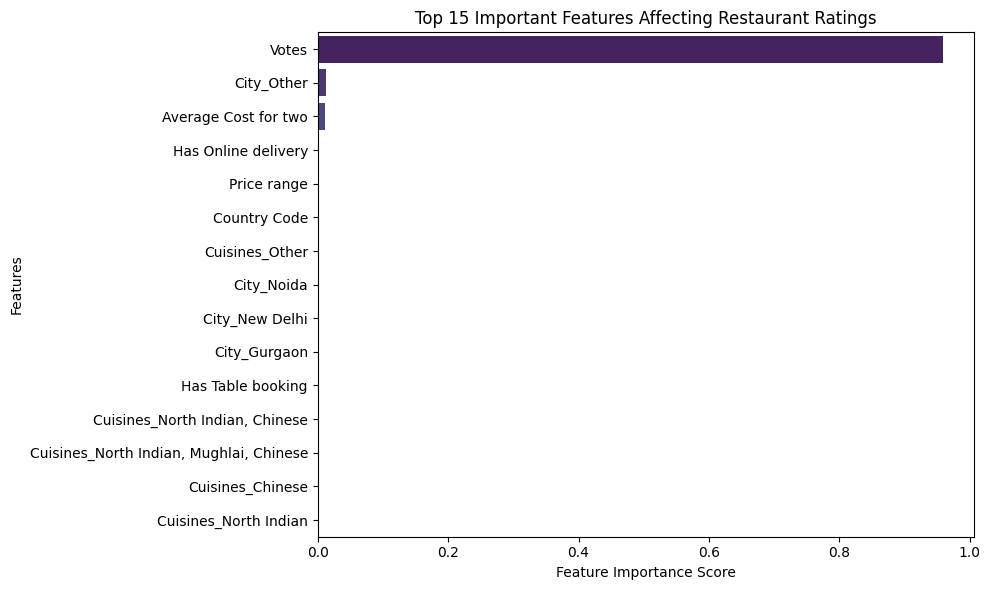

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, hue=top_features.index, palette="viridis", legend=False)
plt.title("Top 15 Important Features Affecting Restaurant Ratings")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


